This notebook provides a really quick diagnostic of where the 4 stars with coinciding SPT & TESS observations lie on the H-R diagram

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
import pandas as pd

In [ ]:
coinciding_flares_df = pd.read_pickle('..\data\spt_tess_candidates.pkl')
names = {'TIC207138379': 'Pike (M4.3)', 'TIC229807000': 'Andes (Binary | M2.5Ve)', 'TIC279255411': 'Matt (Teff:6691 K)', 'TIC401838575': 'Liz (M5.5e)'} # distance in parsecs calculated from parallax from simbdad in mas    
print(coinciding_flares_df.columns)
coinciding_flares_df

Index(['index', 'spt_id', 'mjd', 'ts', 'ra', 'dec', '95_flux', '95_flux_err',
       '150_flux', '150_flux_err', '220_flux', '220_flux_err',
       'spectral_index_95_150', 'spectral_index_95_150_err',
       'spectral_index_150_220', 'spectral_index_150_220_err', 'dr3_source_id',
       'p-value', 'source_ra', 'source_dec', 'phot_g_mean_mag',
       'phot_bp_mean_mag', 'phot_rp_mean_mag', 'parallax', 'parallax_err',
       'binary', '2rxs_id', '2rxs_ref', '2rxs_flux', 'sectors', 'TIC'],
      dtype='object')


,index,spt_id,mjd,ts,ra,dec,95_flux,95_flux_err,150_flux,150_flux_err,...,phot_bp_mean_mag,phot_rp_mean_mag,parallax,parallax_err,binary,2rxs_id,2rxs_ref,2rxs_flux,sectors,TIC
0,42,SPT-SV J232857.8-680230,59067.63,69.829680,352.241137,-68.041907,33.132387,6.050987,44.396645,6.479653,...,13.298294,10.835975,21.814973,0.016096,True,2RXS J232857.7-680225,Freund,0.0,[28],TIC229807000
1,43,SPT-SV J220610.2-460354,59068.28,65.720511,331.542835,-46.065046,47.818806,8.045753,50.842904,8.377214,...,11.394999,10.820612,2.686802,0.032307,False,NaN,NaN,NaN,[28],TIC279255411
2,46,SPT-SV J025532.4-570257,59110.27,1233.665708,43.885140,-57.049441,162.083004,7.148120,206.963060,7.665012,...,16.325182,13.060138,21.889704,0.021013,False,NaN,NaN,NaN,[29],TIC207138379
3,49,SPT-SV J014432.2-460435,59131.78,48.975169,26.134435,-46.076393,45.598152,8.294850,36.632626,8.695313,...,18.198709,14.208293,25.949235,0.045132,False,NaN,NaN,NaN,[30],TIC401838575


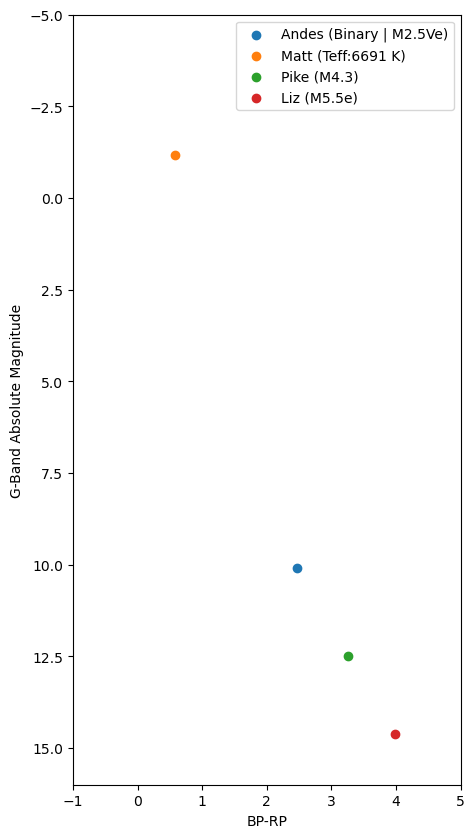

In [3]:
f, ax = plt.subplots(1,1, figsize= (5,10))
for i, flare in coinciding_flares_df.iterrows(): 
    bp = flare['phot_bp_mean_mag']
    rp = flare['phot_rp_mean_mag']
    g_mag = flare['phot_g_mean_mag']
    parallax = flare['parallax']
    ax.scatter(bp-rp, g_mag-5*np.log(100/(np.pi*parallax)), label= names[flare['TIC']])
ax.set_xlabel('BP-RP')
ax.set_ylabel('G-Band Absolute Magnitude')
ax.set_ylim(16,-5)
ax.set_xlim(-1,5)
ax.legend()


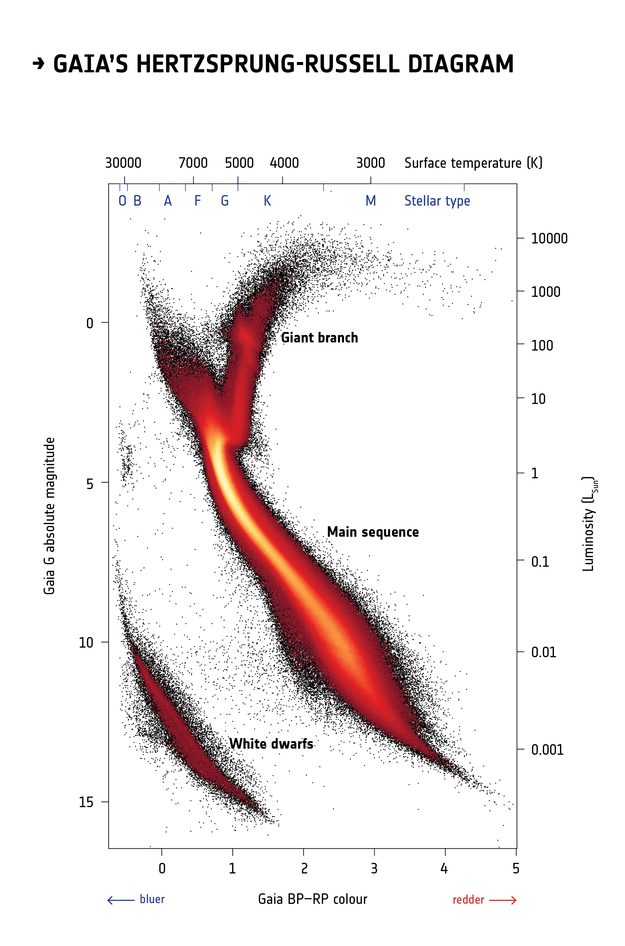